In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Ad Click Data.csv")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [4]:
##using .info() to check for missing values and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [8]:
###since there are some rows with missing columns we will fill these rows with median 

In [9]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy="median")

In [10]:
df_num = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male','Clicked on Ad']]

In [12]:
imputer.fit(df_num)
X = imputer.transform(df_num)
df_num = pd.DataFrame(X, columns=df_num.columns)

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   float64
 5   Clicked on Ad             1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [14]:
###there are now no null numerical values 

Text(0.5, 0, 'Age')

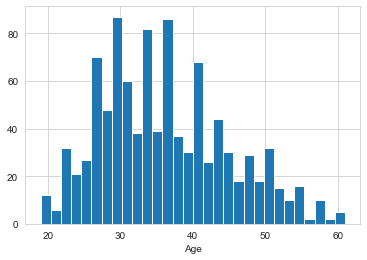

In [16]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

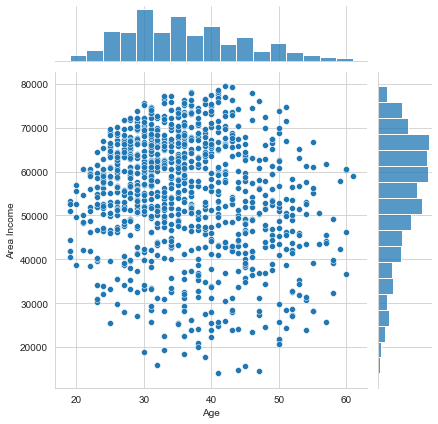

In [17]:
sns.jointplot(x='Age',y='Area Income',data=df)

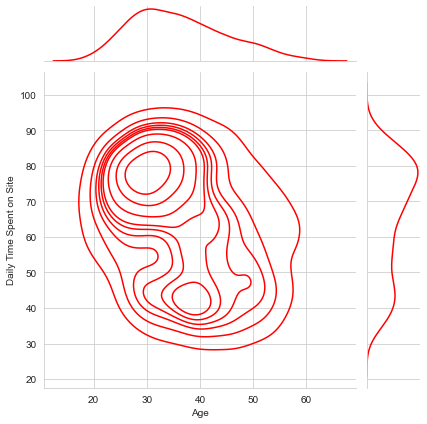

In [20]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,color='red',kind='kde')

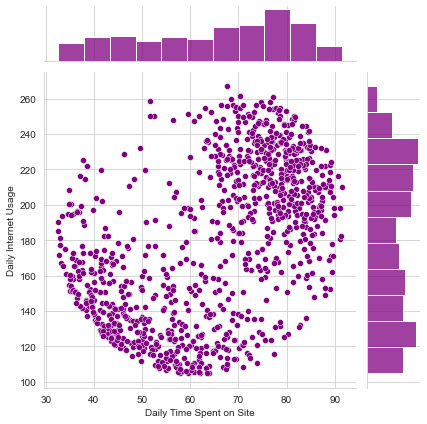

In [23]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df,color='purple')

In [28]:
from sklearn.model_selection import train_test_split

In [34]:
X = df_num[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = df_num['Clicked on Ad']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [38]:
predictions = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       162
         1.0       0.96      0.85      0.90       168

    accuracy                           0.90       330
   macro avg       0.91      0.90      0.90       330
weighted avg       0.91      0.90      0.90       330



In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = (confusion_matrix(y_test,predictions))
print(confusion_matrix)

[[156   6]
 [ 26 142]]
